In [157]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.measure import label as sklabel

In [271]:
path = "ISIC_0014712"
image = plt.imread(f'data/example_image/{path}.jpg')
mask = plt.imread(f'data/example_segmentation/{path}_segmentation.png')

In [159]:
# https://stackoverflow.com/questions/50899692/most-dominant-color-in-rgb-image-opencv-numpy-python
def bincount_app(a):
    a2D = a.reshape(-1,a.shape[-1])
    col_range = (256, 256, 256) # generically : a2D.max(0)+1
    a1D = np.ravel_multi_index(a2D.T, col_range)
    return np.unravel_index(np.bincount(a1D).argmax(), col_range)

color_range = bincount_app(image)
# Add some upper and lower bounds for the color range
lower = np.array(color_range) - 50
upper = np.array(color_range) + 50

In [160]:
# Show only the original mask on the entire image
im_roi_opened = image.copy()
im_roi_opened[mask==0] = 0

In [161]:
lower, upper, color_range

(array([124,  97,  78], dtype=int64),
 array([224, 197, 178], dtype=int64),
 (174, 147, 128))

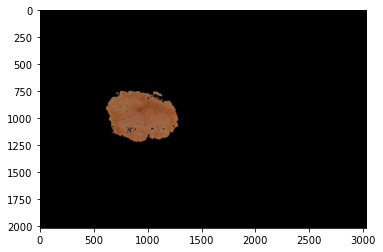

In [162]:
# Remove everything that is not in the range
cv_mask = cv2.inRange(im_roi_opened, lower, upper)
# cv_image = cv2.bitwise_not(im_roi_opened, im_roi_opened, mask = cv_mask)
cv_image = im_roi_opened.copy()
cv_image[cv_mask!=0] = 0

# Show image
plt.imshow(cv_image)

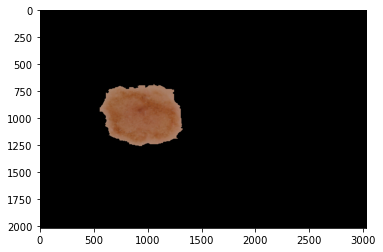

In [163]:
# Compare to mask from original dataset
plt.imshow(im_roi_opened)

In [164]:
# Get the biggest connected component
# https://stackoverflow.com/a/63842045/8660908
img_bw = cv_image > 0
labels = sklabel(img_bw, return_num=False)
maxCC_nobcg = labels == np.argmax(np.bincount(labels.flat, weights=img_bw.flat))

# Apply the maxCC_nobcg mask to the cv_image
cv_image_nobcg = cv_image.copy()
cv_image_nobcg[maxCC_nobcg==0] = 0

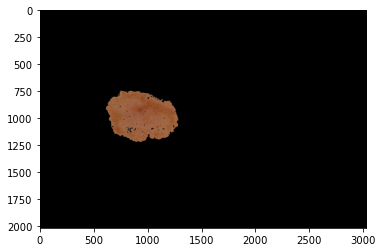

In [165]:
plt.imshow(cv_image_nobcg)

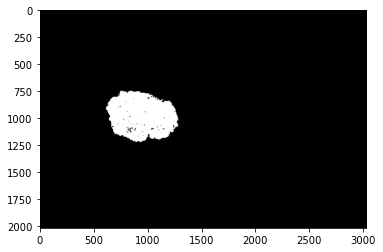

In [168]:
# Turn cropped mask image into grayscale
cv_image_nobcg_gray = cv2.cvtColor(cv_image_nobcg, cv2.COLOR_BGR2GRAY)
# Turn into black and white
cv_image_nobcg_bw = cv_image_nobcg_gray > 0 # > 0 because of the grayscale
# Show image
plt.imshow(cv_image_nobcg_bw, cmap='gray') # cmap='gray' to show black and white

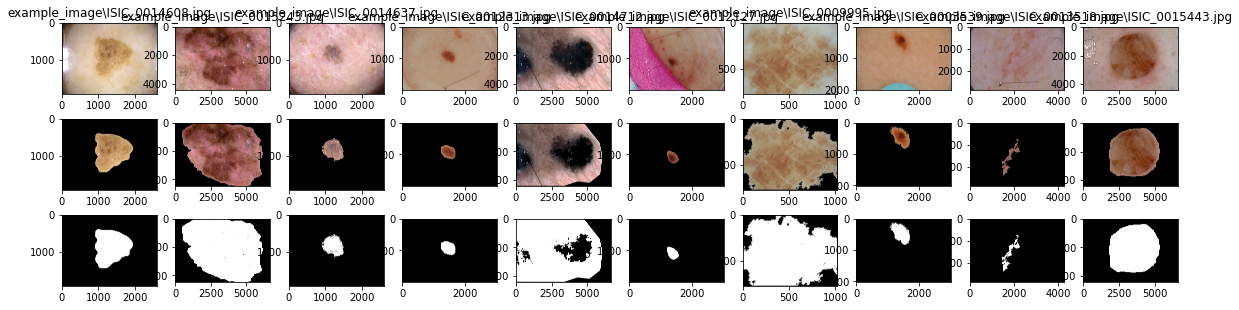

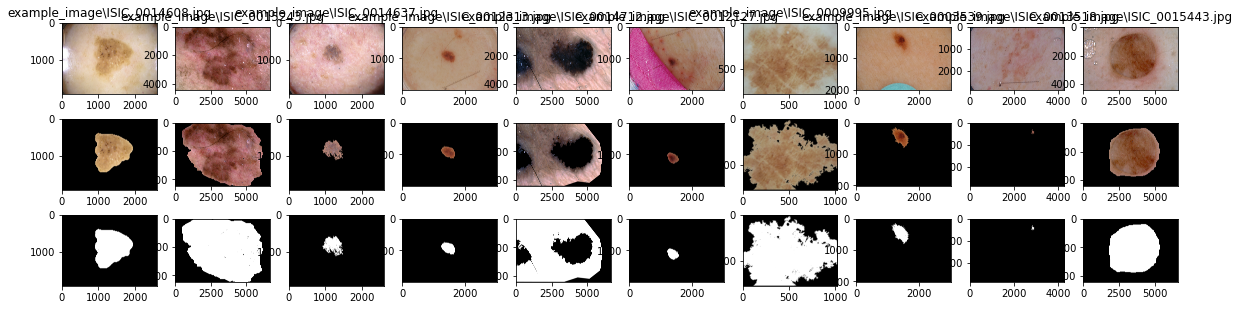

In [202]:
# Run the function on 10 random images
import glob

images = glob.glob('data/example_image/*.jpg')
# Sample 10 random images
images = np.random.choice(images, 10, replace=False)

def plot_samples(images, bound):
    # Open respective images and masks
    images_mask = []
    for image in images:
        image_mask = image.replace('example_image', 'example_segmentation')
        # Add "_segmentation.png" to the end of the image name
        image_mask = image_mask.replace('.jpg', '_segmentation.png') 
        images_mask.append((plt.imread(image), plt.imread(image_mask)))

    # Run the images through the extract_mask_roi function
    images_mask_new = []
    for image, mask in images_mask:
        new_image, new_mask = util.extract_mask_roi(image, mask, bound, bound)
        images_mask_new.append((new_image, new_mask))

    # Plot all images_mask_new images as subplots
    plt.figure(figsize=(20,5))
    for i, (image, mask) in enumerate(images_mask_new):
        # Plot the original image on row 1
        plt.subplot(3, 10, i+1)  
        plt.imshow(images_mask[i][0])
        # Add a title with file name on top of original image
        plt.title(images[i].split('/')[-1])
        # Plot the new mask on row 2 right underneath the original image
        plt.subplot(3, 10, i+11)
        plt.imshow(image)
        # Plot the new binary mask on row 3
        plt.subplot(3, 10, i+21)
        plt.imshow(mask, cmap='gray')

        # plt.subplot(1, len(images_mask_new), i+1)
        # plt.imshow(image)
        # plt.imshow(mask, alpha=0.5)
plot_samples(images, 20)
plot_samples(images, 40)